In [1]:
!pip install xgboost

In [2]:
# Import necessary libraries
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [5]:
# Exploratory Data Analysis (EDA)

In [6]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

In [7]:
print(data.describe())

       Unnamed: 0     X1     X2     X3     X4     X5     X6     X7     X8  \
count       30001  30001  30001  30001  30001  30001  30001  30001  30001   
unique      30001     82      3      8      5     57     12     12     12   
top            ID  50000      2      2      2     29      0      0      0   
freq            1   3365  18112  14030  15964   1605  14737  15730  15764   

           X9  ...    X15    X16    X17    X18    X19    X20    X21    X22  \
count   30001  ...  30001  30001  30001  30001  30001  30001  30001  30001   
unique     12  ...  21549  21011  20605   7944   7900   7519   6938   6898   
top         0  ...      0      0      0      0      0      0      0      0   
freq    16455  ...   3195   3506   4020   5249   5396   5968   6408   6703   

          X23      Y  
count   30001  30001  
unique   6940      3  
top         0      0  
freq     7173  23364  

[4 rows x 25 columns]


In [8]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64


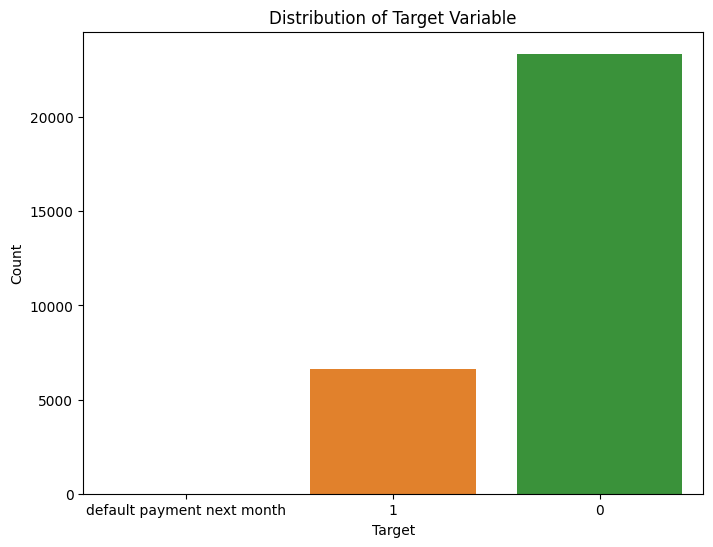

In [9]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Y', data=data)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [10]:
data = data.drop(0)
data

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [11]:
# Convert all columns to numeric
data = data.apply(pd.to_numeric, errors='coerce')


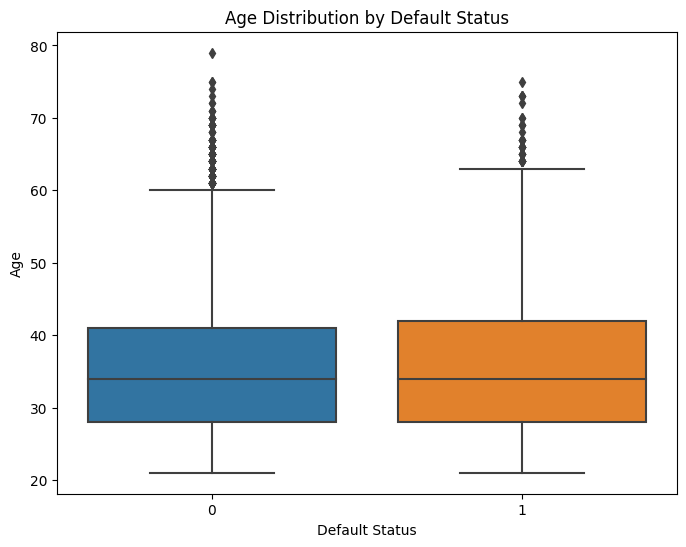

In [12]:
# Box plot for age distribution by default status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Y', y='X5', data=data)
plt.title('Age Distribution by Default Status')
plt.xlabel('Default Status')
plt.ylabel('Age')
plt.show()


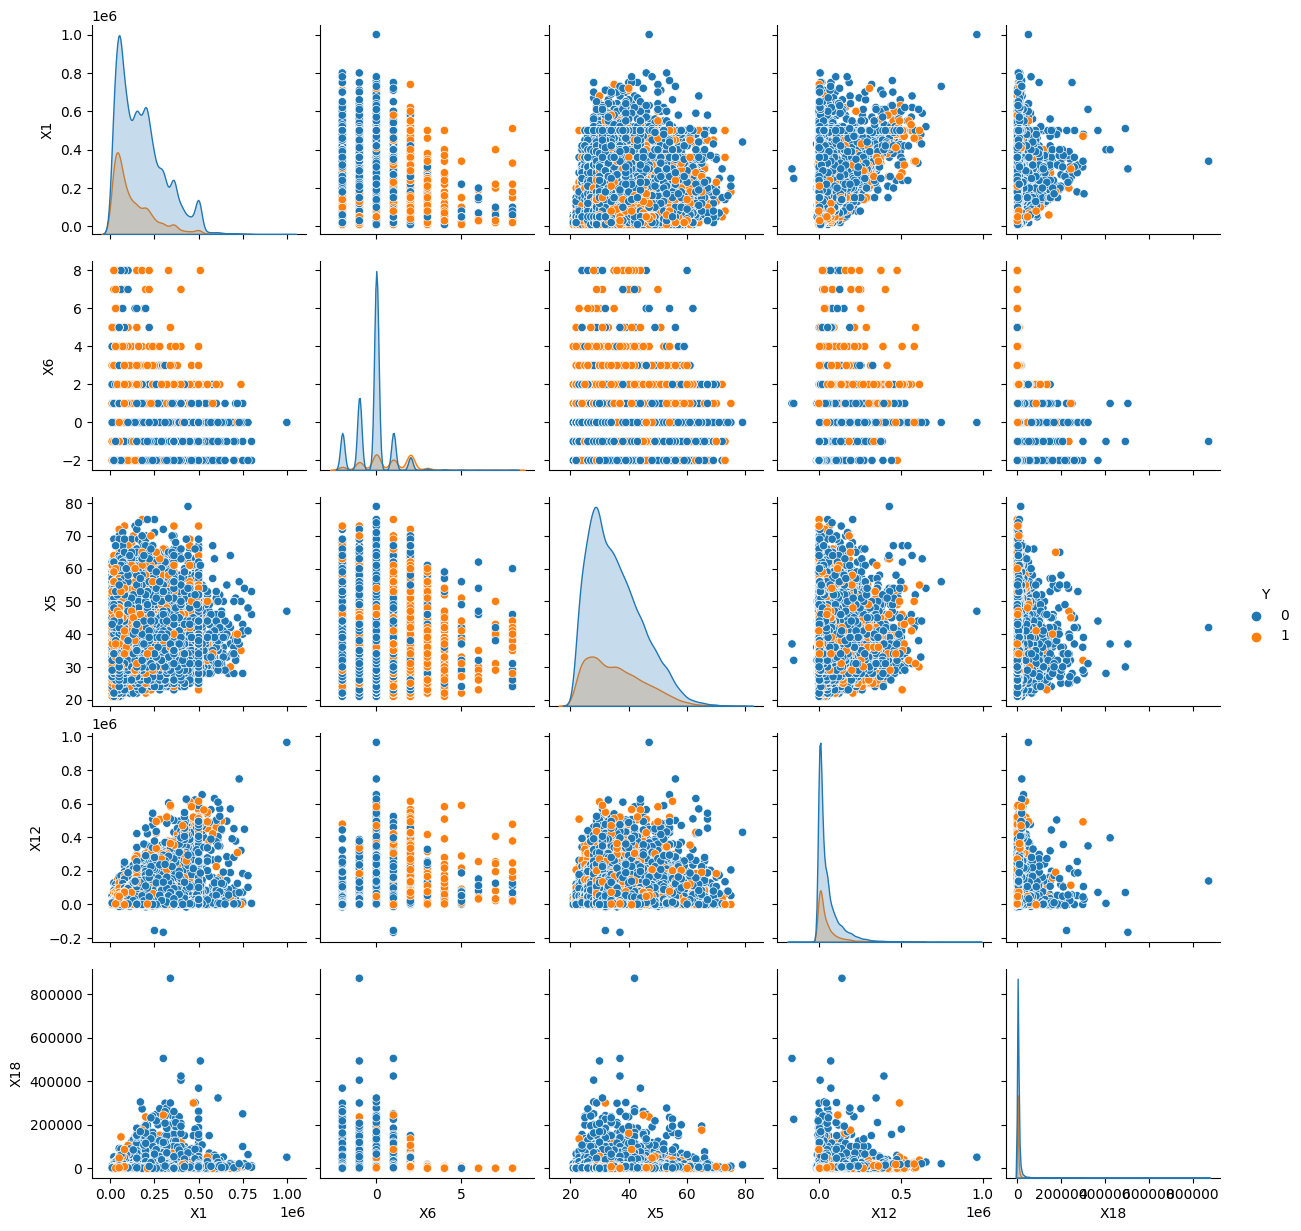

In [13]:
# Pair plot for selected numerical features
# Pair plot for selected numerical features
#['LIMIT_BAL', 'AGE', 'PAY_0', 'BILL_AMT1', 'PAY_AMT1', 'default payment next month']], hue='default payment next month'
sns.pairplot(data[['X1', 'X6', 'X5', 'X12', 'X18', 'Y']], hue='Y')
plt.show()


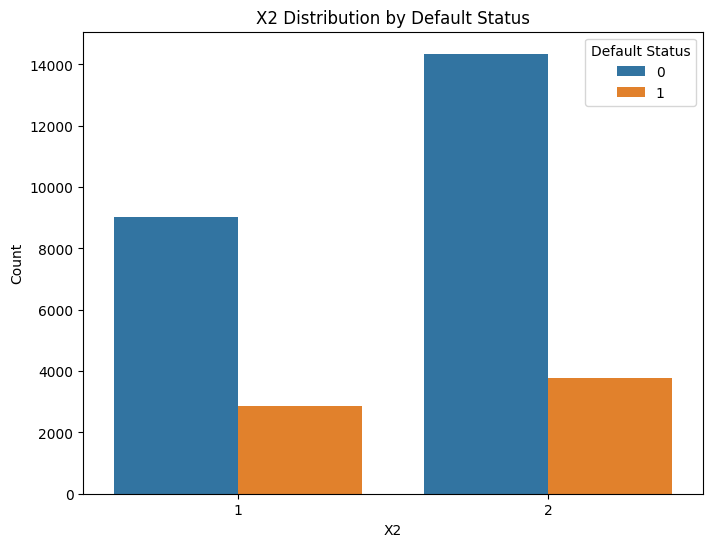

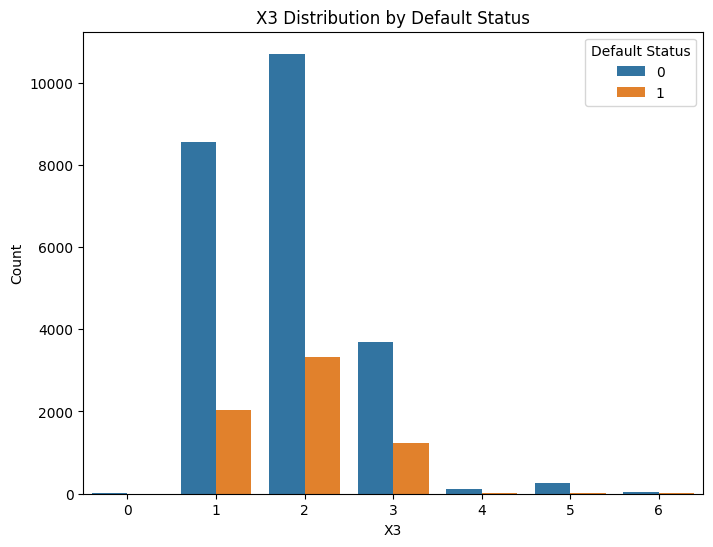

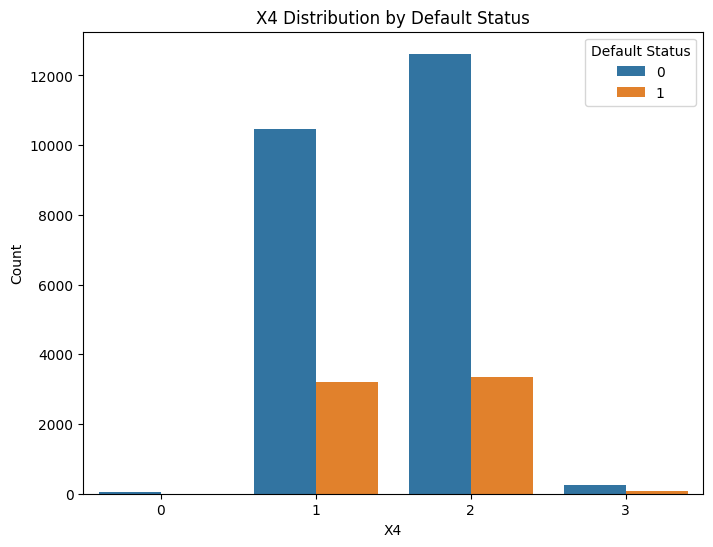

In [14]:
# Explore categorical features  ['SEX', 'EDUCATION', 'MARRIAGE']
categorical_cols = ['X2', 'X3', 'X4']
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='Y', data=data)
    plt.title(f'{col} Distribution by Default Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Default Status', loc='upper right')
    plt.show()

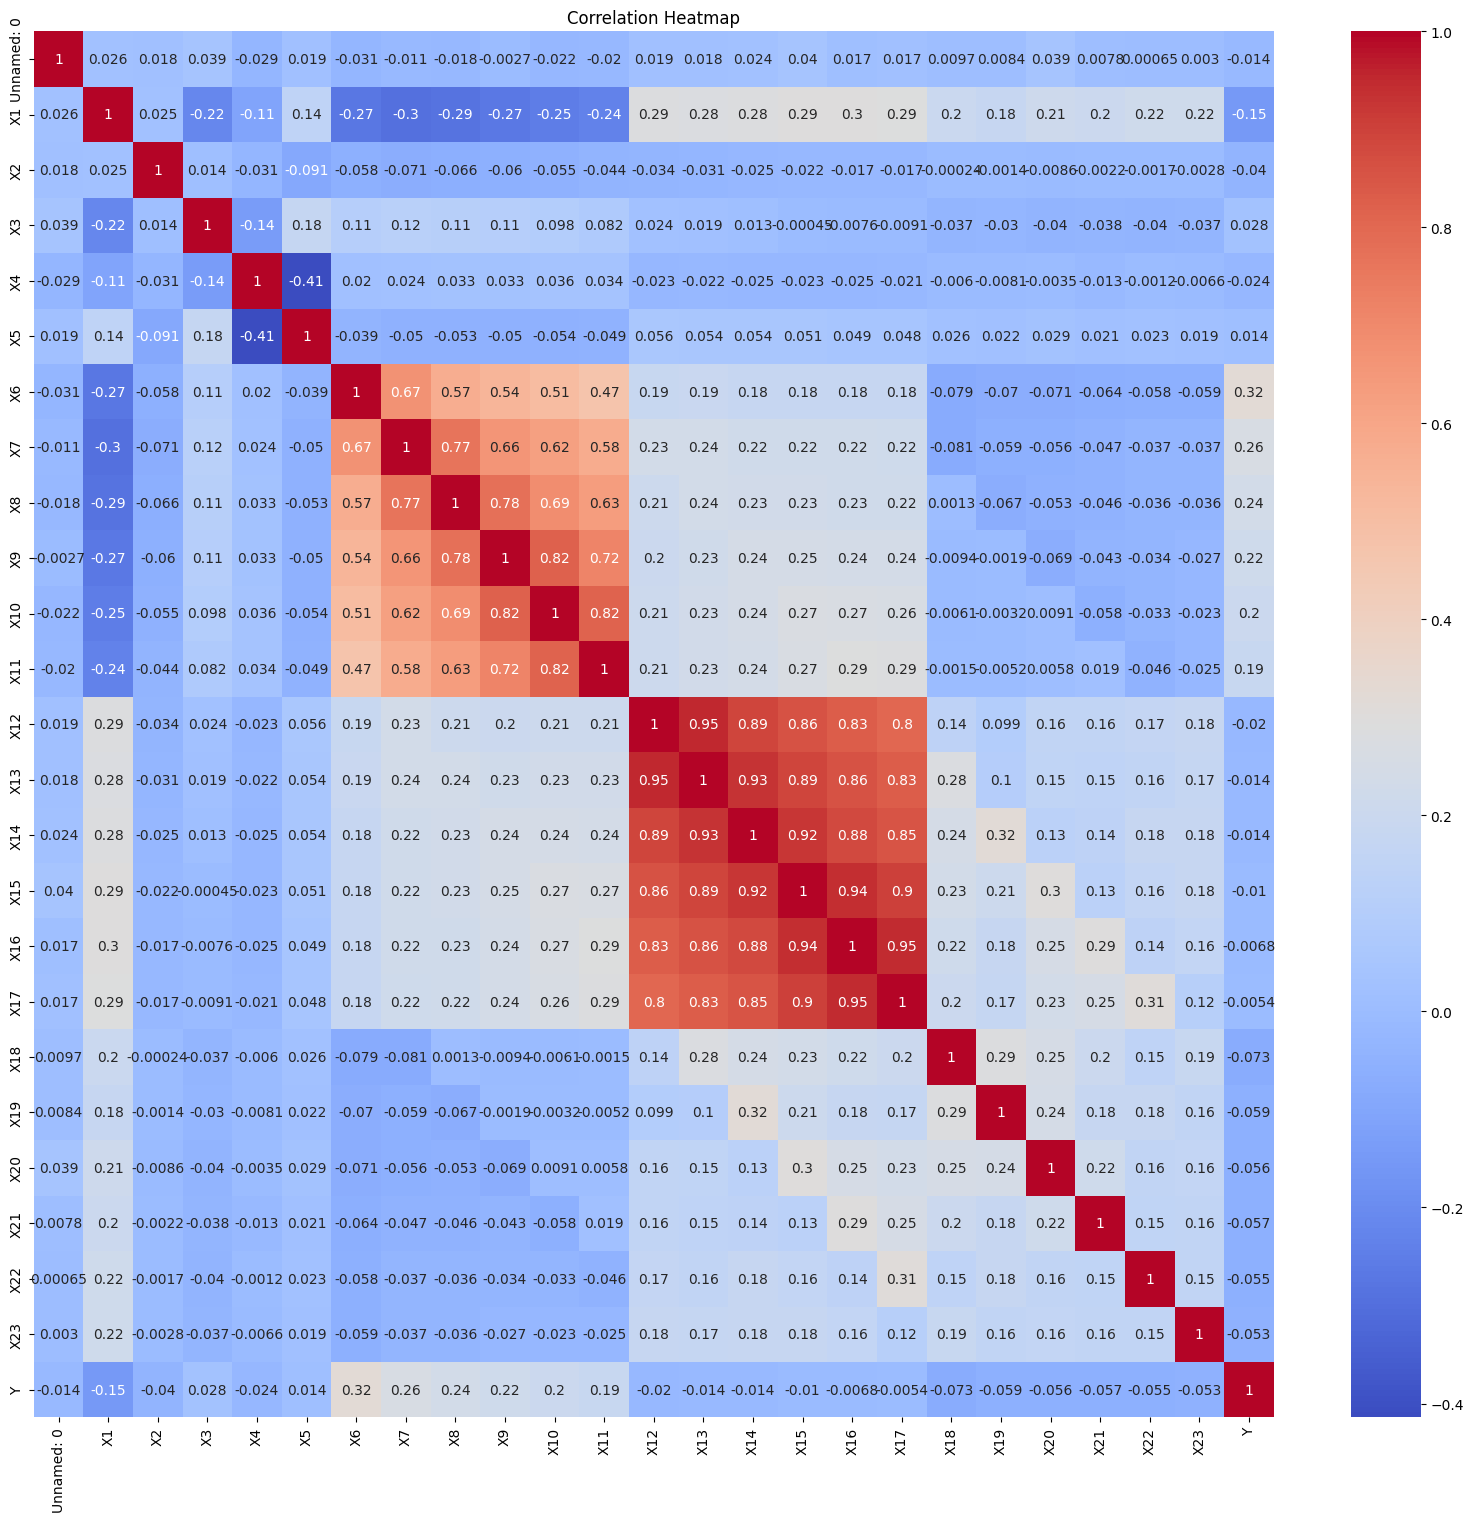

In [15]:
# Visualize correlations between features
correlation_matrix = data.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [16]:
data

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [17]:
#Preprocessing
def preprocessing(data):
    # Assuming you have a DataFrame named 'data'
    data.dropna(inplace=True)  # Drop rows with null or NaN values

    # Reset the index if needed
    data.reset_index(drop=True, inplace=True)
    
    data = data.drop(0)
    
    #Drop target
    X = data.drop('Y', axis=1)
    
    #Drop ID
    X = X.drop('Unnamed: 0', axis=1)
    
    #Target
    y = data['Y']
    
    return X, y

In [18]:
# Transform data
def transformData(X_train, X_test, y_train, y_test):
    # Label Encoding
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.fit_transform(y_test)
    
    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

In [19]:
X, y = preprocessing(data)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled, X_test_scaled, y_train, y_test = transformData(X_train, X_test, y_train, y_test)

In [21]:
smote = SMOTE(random_state=42)
X_train_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)

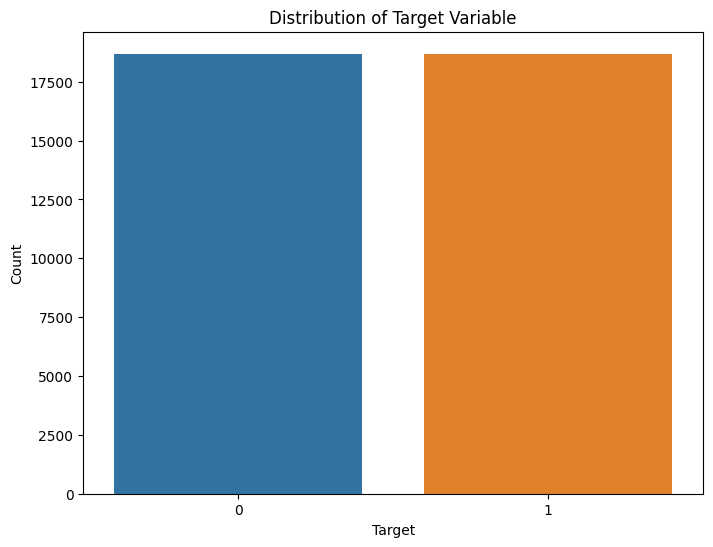

In [22]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [23]:
X_train_scaled

array([[-0.12932766,  0.80797506, -1.08017445, ..., -0.27320499,
        -0.30860887,  0.05512315],
       [-0.20627352,  0.80797506,  0.18270403, ..., -0.06002346,
        -0.07028379, -0.10942503],
       [-0.66794869,  0.80797506,  0.18270403, ..., -0.30664523,
        -0.2115158 , -0.11556093],
       ...,
       [-0.59862837,  0.80797506,  0.18270403, ..., -0.30664523,
        -0.05002744, -0.22959035],
       [ 1.82798748,  0.80797506,  0.41946765, ...,  0.54477458,
         0.50664753,  0.48744941],
       [ 1.61190291,  0.80797506, -0.86379513, ...,  0.26408898,
         0.2580822 ,  0.51612305]])

In [24]:
# Train multiple models
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('SVC', SVC(probability=True, random_state=42)),
    ('XGBoost', XGBClassifier(n_estimators=100, random_state=42))
]

# Perform grid search on individual models
best_models = []

for name, model in models:
    if name == 'Logistic Regression':
        param_grid = {'C': [0.1, 1.0, 10.0]}
    elif name == 'Random Forest':
        param_grid = {'n_estimators': [100, 200]}
    elif name == 'SVC':
        param_grid = {'C': [0.1, 1.0, 10.0]}
    elif name == 'XGBoost':
        param_grid = {'n_estimators': [100, 200]}

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    best_models.append((name, best_model))

# Evaluate best models
for name, best_model in best_models:
    y_pred = best_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    
    print(f"Best {name} Accuracy: {accuracy:.2f}")
    print(f"Best {name} Classification Report:\n", classification_rep)
    print(f"Best {name} Hyperparameters:", grid_search.best_params_)

Best Logistic Regression Accuracy: 0.68
Best Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.69      0.77      4671
           1       0.38      0.68      0.49      1329

    accuracy                           0.68      6000
   macro avg       0.63      0.68      0.63      6000
weighted avg       0.77      0.68      0.71      6000

Best Logistic Regression Hyperparameters: {'n_estimators': 100}
Best Random Forest Accuracy: 0.80
Best Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      4671
           1       0.56      0.51      0.53      1329

    accuracy                           0.80      6000
   macro avg       0.71      0.70      0.70      6000
weighted avg       0.80      0.80      0.80      6000

Best Random Forest Hyperparameters: {'n_estimators': 100}
Best SVC Accuracy: 0.76
Best SVC Classification Report:
  

In [25]:
# Create a soft voting ensemble
voting_models = [(name, best_model) for name, best_model in best_models]
voting_classifier = VotingClassifier(estimators=voting_models, voting='soft')  # 'soft' for probability-based voting

# Fit the ensemble model
voting_classifier.fit(X_train_scaled, y_train)

# Make predictions using the ensemble
y_pred_probs = voting_classifier.predict_proba(X_test_scaled)
y_pred = y_pred_probs.argmax(axis=1) 
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Ensemble Accuracy: {accuracy:.2f}")
print("Ensemble Classification Report:\n", classification_rep)

Ensemble Accuracy: 0.80
Ensemble Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87      4671
           1       0.55      0.53      0.54      1329

    accuracy                           0.80      6000
   macro avg       0.71      0.70      0.71      6000
weighted avg       0.80      0.80      0.80      6000



In [26]:
# Create a hard voting ensemble
voting_models = [(name, best_model) for name, best_model in best_models]
voting_classifier = VotingClassifier(estimators=voting_models, voting='hard') 

# Fit the ensemble model
voting_classifier.fit(X_train_scaled, y_train)

# Make predictions using the ensemble
y_pred = voting_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Ensemble Accuracy: {accuracy:.2f}")
print("Ensemble Classification Report:\n", classification_rep)

Ensemble Accuracy: 0.81
Ensemble Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      4671
           1       0.60      0.48      0.53      1329

    accuracy                           0.81      6000
   macro avg       0.73      0.69      0.71      6000
weighted avg       0.80      0.81      0.81      6000



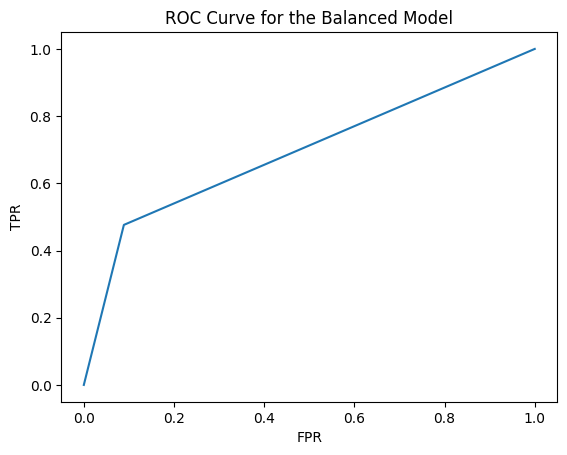

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(y_test,  y_pred)
plt.plot(fpr,tpr)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title("ROC Curve for the Balanced Model")
plt.show()

In [28]:
#AUC value
auc_value = roc_auc_score(y_test, y_pred)
print("AUC:", auc_value)

AUC: 0.6937259484461301


In [29]:
# Save the ensemble model
joblib.dump(voting_classifier, 'CreditDefaultPrediction.pkl')


['CreditDefaultPrediction.pkl']